In [2]:
exec(open("CrosswalkGeometry.py", "r").read())
exec(open("init_notebook.py", "r").read())
%load_ext autoreload
%autoreload 2

current working dirC:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments


In [3]:
from shapely.geometry import Polygon, Point, LineString
from shapely.affinity import rotate
import matplotlib.pyplot as plt
import math
import random
import seaborn as sb
# from agents.pedestrians.destination import CrosswalkGeometry

In [4]:
# Case 2: changing ideal destination point
# Plot polygons and points
goalLine = LineString([(0, 12), (12, 12)])
start = Point(6, 0)
endPoints = [Point(0, 12), Point(3, 12), Point(6, 12), Point(9, 12), Point(12, 12)]
end = Point(6, 12)
p = None
nIntermediate = 3

In [5]:
crosswalkGeometry = CrosswalkGeometry(
            source=start,
            idealDestination=end,
            areaPolygon=p,
            goalLine=goalLine
        )

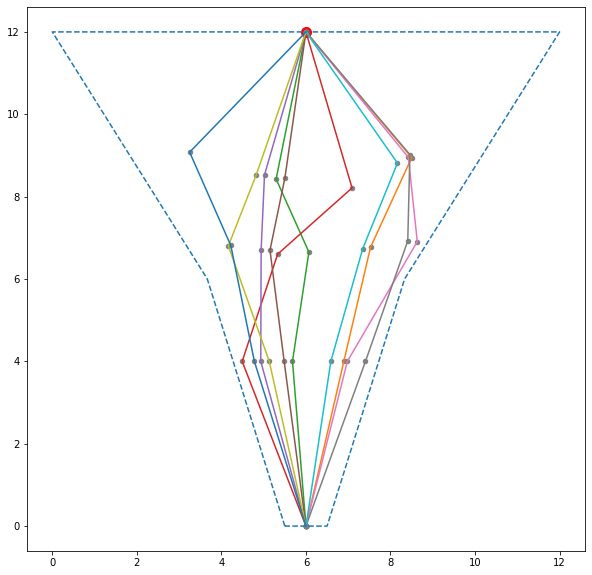

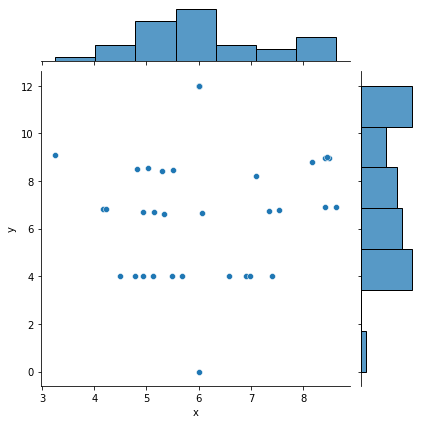

In [6]:
data = {'x': [], 'y': []}

p = crosswalkGeometry.areaPolygon
x,y = p.exterior.xy

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(x,y, '--')
plt.scatter(end.x, end.y, s=100, color='red')

maxAbsDegree = math.radians(60)
maxDeltaDegree = math.radians(45)

for i in range(10):
    line_x = []
    line_y = []
    waypoints = crosswalkGeometry.generateIntermediatePoints(maxAbsDegree, maxDeltaDegree, nIntermediate, 1.5)
    
    waypoints.insert(0, start)
    

    for j in range(len(waypoints)):
        line_x.append(waypoints[j].x)
        line_y.append(waypoints[j].y)

        if waypoints[j].y != start.y:
            data['x'].append(waypoints[j].x)
            data['y'].append(waypoints[j].y)

        plt.scatter(waypoints[j].x, waypoints[j].y, s=20, color='grey')
        

    plt.plot(line_x, line_y)

# plt.savefig("figures/control.png")
# Visualizing data
data['x'].append(start.x)
data['y'].append(start.y)
fig = sb.jointplot(data=data, x='x', y='y')
# fig.savefig("figures/control_dist.png")